Question 1. Python program to create KNN Classification on Iris dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
#Splitting the features and labels
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [7]:
#converting into numbers as Knn Classifier does not accept strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
#splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


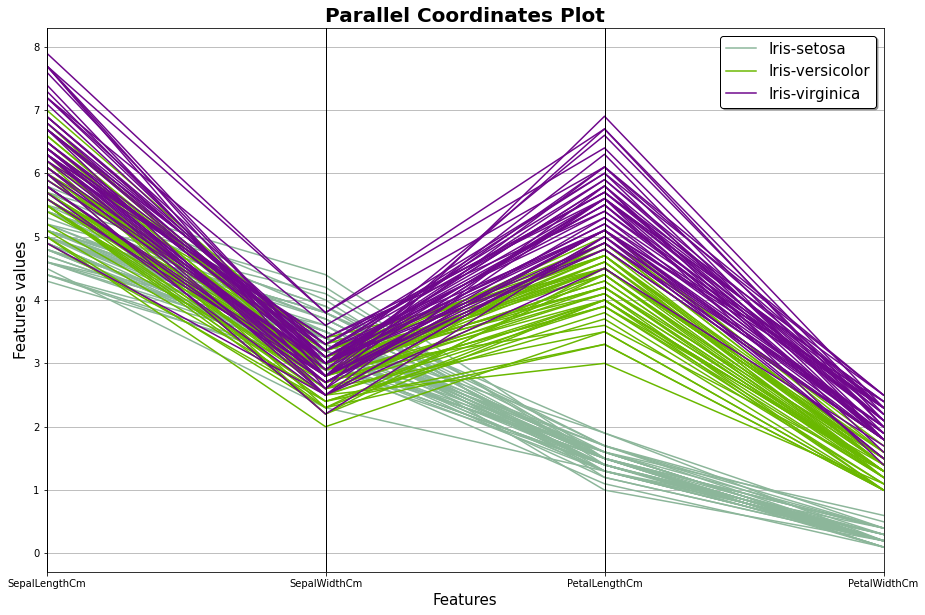

In [15]:
#Creating plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
#This plot above represents attributes. for example every line segment is an attribute.
#One set of connected line segments represents one data point.
# Points that tend to cluster will appear closer together.

Question 2. Computing steady state probabilities.

In [19]:

import numpy as np

one_step_transition = np.array([[0.6     , 0.1, 0.1, 0.2      ],
       [0.2      , 0.6, 0.1,  0.1      ],
       [0.2     , 0.4, 0.1, 0.3        ],
       [0.1,       0.5,  0.2, 0.2]])


def steady_state_prop(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)

steady_state_matrix = steady_state_prop(one_step_transition.transpose())

print (steady_state_matrix)

[0.25 0.25 0.25 0.25]
